In [2]:
import os, sys
os.environ['NEURITE_BACKEND'] = 'pytorch'
os.environ['VXM_BACKEND'] = 'pytorch'
import numpy as np
import voxelmorph as vxm
import neurite as ne
import torch
import time
from pystrum.pytools.plot import jitter
import matplotlib
import pickle

In [13]:
[ccmap, scrambled_cmap] = jitter(255, nargout=2)
scrambled_cmap[0, :] = np.array([0, 0, 0, 1])
ccmap = matplotlib.colors.ListedColormap(scrambled_cmap)

In [3]:
def pkload(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

image, label = pkload("/DATA/jakaria_data/CMPUT-617/data/IXI_data/Train/subject_0.pkl") 
# image: a preprocessed T1-weighted brain MRI volume. Shape: 160 x 192 x 224 Intensity: [0,1]
# label: the corresponding subcortical segmentations. Shape: 160 x 192 x 224 Intensity: Integers

In [11]:
label.shape

(160, 192, 224)

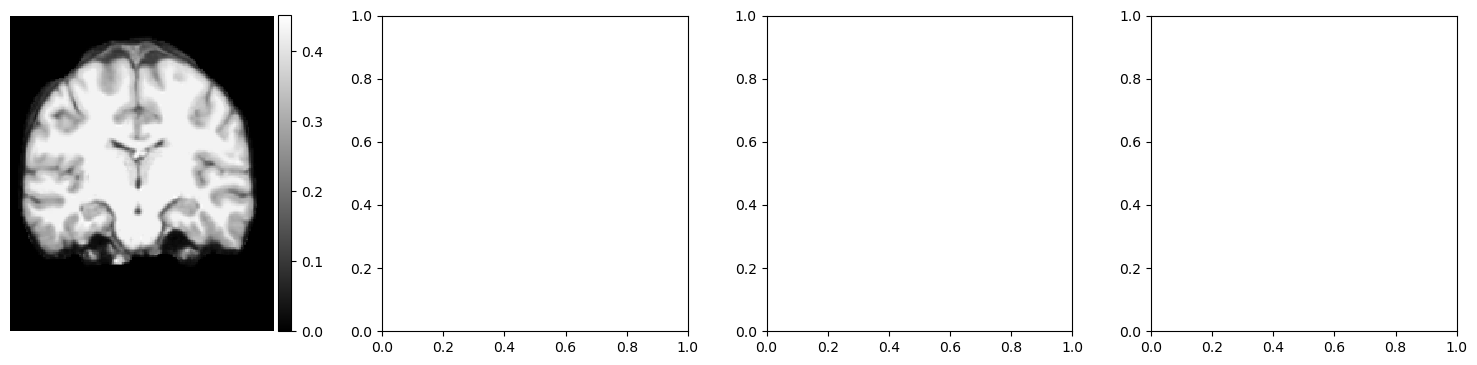

In [10]:
vol_shape = image.shape
mid_slices_fixed = np.take(image, vol_shape[2]//2, axis=2)
mid_slices_fixed = np.rot90(mid_slices_fixed, -1)
ne.plot.slices(mid_slices_fixed, cmaps=['gray'], do_colorbars=True, grid=[1,4]);

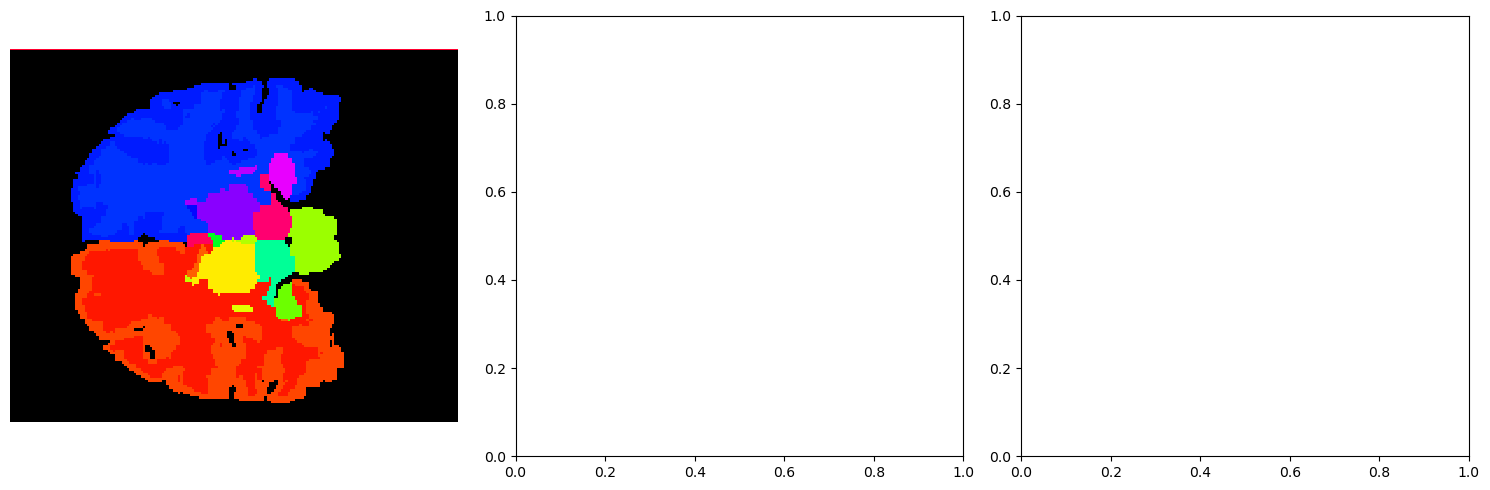

In [17]:
mid_slices_seg = [np.take(label, vol_shape[2]//2, axis=2)]
#mid_slices_seg = [np.rot90(mid_slices_fixed, -1)]
slices = mid_slices_seg
for si, slc  in enumerate(slices):
    slices[si][0] = 255
    slices[si] = np.rot90(mid_slices_fixed, -1)
ne.plot.slices(slices, cmaps = [ccmap], grid=[1,3]);